In [39]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Neural network imports
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Prepare data
raw_data = pd.read_csv('../data/genre_dataset.csv')

data = raw_data[
    ['danceability', 'energy', 'valence', 'tempo', 'instrumentalness', 
     'liveness', 'speechiness', 'genre']
]

features = ['danceability', 'energy', 'valence', 'tempo', 
            'instrumentalness', 'liveness', 'speechiness']
target = 'genre'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding of output variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [34]:
# Create model
model = Sequential([
    tf.keras.Input(shape=(7,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'),
    Dense(5, activation='linear') # Linear output so as to reduce rounding error with from_logits=True
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3603 - loss: 1.4809 - val_accuracy: 0.8150 - val_loss: 0.9155
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8296 - loss: 0.7094 - val_accuracy: 0.8562 - val_loss: 0.4448
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8649 - loss: 0.4101 - val_accuracy: 0.8650 - val_loss: 0.3936
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8813 - loss: 0.3537 - val_accuracy: 0.8637 - val_loss: 0.3729
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8686 - loss: 0.3549 - val_accuracy: 0.8725 - val_loss: 0.3640
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8849 - loss: 0.3283 - val_accuracy: 0.8800 - val_loss: 0.3606
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8865 - loss: 0.3192 - val_accuracy: 0.8813 - val_loss: 0.3557
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.8810 - loss: 0.3392 - va

In [36]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9121 - loss: 0.3327


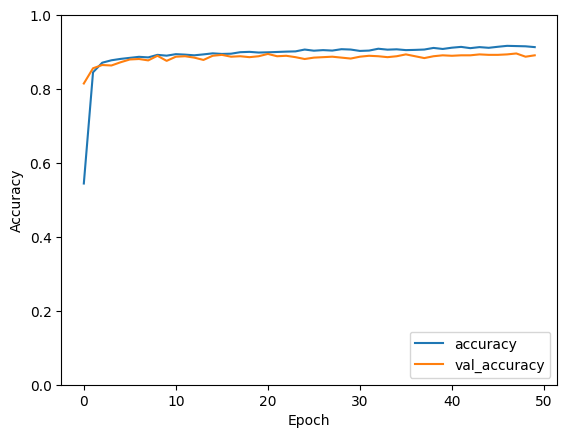

In [47]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig('../figs/nn_training_acc.png')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


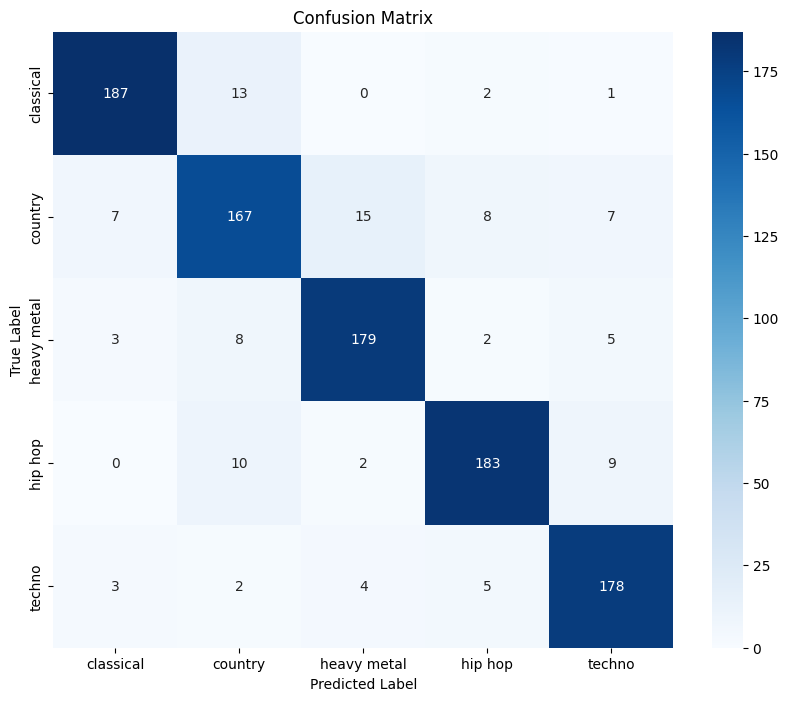

In [48]:
# Confusion  matrix
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred)
conf_matrix = confusion_matrix(y_pred_labels, y_test)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('../figs/nn_conf_mat.png')
plt.show()